지금까지는 일반적인 인공신경망, Dense(조밀 신경말)<br>
앞으로 할 것은 CNN(Convolutional Neural Networks)-> 영상에 특화된 알고리즘<br>
https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten # 이미지를 28 * 28 을 한 줄((784)로 해주는 함수
from tensorflow.keras import datasets # 이미 train, test 가 나눠져 있다.
from keras.utils import np_utils

In [2]:
(X_train, Y_train), (X_test, Y_test) = datasets.fashion_mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
label = ['T-shirt', 'trouser', 'pullover', 'dress', 'coat',
         'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

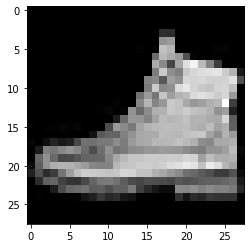

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  46
   43   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 146
  155   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0   0 193
  181   0   0   0   0   1   4   3   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 108 185
  171 155  81   3   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 171 138
   70 167 222 244 186 132  59   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

In [4]:
my_sample = np.random.randint(60000)
plt.imshow(X_train[my_sample], cmap = 'gray')
plt.show()
print(Y_train[my_sample]) # Y 값 one hot, scailing
print(X_train[my_sample]) # 이미지는 각자의 픽셀의 값을 숫자로 나타낸 것

In [5]:
y_train = np_utils.to_categorical(Y_train) #ont hot을 자동으로 해주는 함수, to_categorical, OneHotEncoder, get_dummies 
y_test = np_utils.to_categorical(Y_test)
print(Y_train[5000])
print(y_train[5000])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [6]:
x_train = X_train / 255 # MinMaxScaler
x_test = X_test / 255
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
print(x_train.shape)
print(x_train[0])
print(x_test.shape)
print(x_test[0])
# reshape을 하지 않고 이미지 그래도 들어간다

(60000, 28, 28, 1)
[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape=(28, 28,1), padding = 'same', activation = 'relu')) #padding = 'same' 입력이미지와 출력 이미지의 크기가 같다 28 * 28, 32=>출력계수(필터의 개수, 다양한 필터 적용) 필터를 적용한 이미지가 32개
model.add(MaxPool2D(padding = 'same', pool_size = (2,2))) # 2 *2의 필터 안에서 가장 큰 값만 남긴다, 2칸씩 이동, 칸이 맞지 않아 부족할 경우 버린다, padding = 'same'을 넣으면 추가한다. 14 * 14
model.add(Conv2D(32, kernel_size = (3,3), padding = 'same', activation = 'relu')) #14*14, 32=>출력계수(필터의 개수, 다양한 필터 적용) 3*3의 필터 세트가 32개 존재 각각의 이미지에 세트가 만들어져 세트끼리만 적용(첫 번째 이미지 - 첫 번째 필터) 
# 그후 같은 위치의 픽셀 값을 더해서 하나의 이미지 완성, 그런 이미지가 32개 필요-> 3*3의 필터가 32개가 32개 필요
model.add(MaxPool2D(padding = 'same', pool_size = (2,2)))# 7*7
model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [8]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [9]:
fit_hist = model.fit(x_train, y_train, batch_size=128, epochs = 20, validation_split = 0.2, verbose = 1)

Epoch 1/20
375/375 [==============================] - 47s 120ms/step - loss: 0.5608 - accuracy: 0.7966 - val_loss: 0.3846 - val_accuracy: 0.8646
Epoch 2/20
375/375 [==============================] - 44s 116ms/step - loss: 0.3607 - accuracy: 0.8707 - val_loss: 0.3377 - val_accuracy: 0.8792
Epoch 3/20
375/375 [==============================] - 44s 118ms/step - loss: 0.3036 - accuracy: 0.8920 - val_loss: 0.3042 - val_accuracy: 0.8907
Epoch 4/20
375/375 [==============================] - 43s 116ms/step - loss: 0.2756 - accuracy: 0.9017 - val_loss: 0.2799 - val_accuracy: 0.8997
Epoch 5/20
375/375 [==============================] - 43s 115ms/step - loss: 0.2522 - accuracy: 0.9088 - val_loss: 0.2628 - val_accuracy: 0.9036
Epoch 6/20
375/375 [==============================] - 43s 116ms/step - loss: 0.2360 - accuracy: 0.9161 - val_loss: 0.2980 - val_accuracy: 0.8930
Epoch 7/20
 72/375 [====>.........................] - ETA: 46s - loss: 0.2282 - accuracy: 0.9174

KeyboardInterrupt: ignored

In [ ]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Final test set accurecy', score[1])

In [ ]:
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()

In [ ]:
my_sample = np.random.randint(10000)
plt.imshow(X_test[my_sample], cmap = 'gray')
print(Y_test[my_sample])
print(label[Y_test[my_sample]])
pred = model.predict(x_test[my_sample].reshape(-1, 28, 28, 1))
print(pred)
print(label[np.argmax(pred)])

지금까지는 일반적인 인공신경망, Dense(조밀 신경말)<br>
앞으로 할 것은 CNN(Convolutional Neural Networks)-> 영상에 특화된 알고리즘


https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53